In [1]:
import urllib.request
import json
import os
import ssl
import ast

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

In [2]:
import numpy as np
import pandas as pd

In [24]:

test = pd.read_csv("../walmart_sales/test_payload1.csv")
test.head()

,Region,Date,Weekly_Sales
0,1,2012-04-20,1521577.87
1,1,2012-04-27,1468928.37
2,1,2012-05-04,1684519.99
3,1,2012-05-11,1611096.05
4,1,2012-05-18,1595901.87


In [25]:
data_ls = []
for index, row in test.iloc[:, :].iterrows():
    row = {
        "Date": row["Date"],
        "Region": row["Region"]
    }
    data_ls.append(row)

In [26]:
data_ls

[{'Date': '2012-04-20', 'Region': 1},
 {'Date': '2012-04-27', 'Region': 1},
 {'Date': '2012-05-04', 'Region': 1},
 {'Date': '2012-05-11', 'Region': 1},
 {'Date': '2012-05-18', 'Region': 1},
 {'Date': '2012-05-25', 'Region': 1},
 {'Date': '2012-06-01', 'Region': 1},
 {'Date': '2012-06-08', 'Region': 1},
 {'Date': '2012-06-15', 'Region': 1},
 {'Date': '2012-06-22', 'Region': 1},
 {'Date': '2012-06-29', 'Region': 1},
 {'Date': '2012-07-06', 'Region': 1},
 {'Date': '2012-07-13', 'Region': 1},
 {'Date': '2012-07-20', 'Region': 1},
 {'Date': '2012-07-27', 'Region': 1},
 {'Date': '2012-08-03', 'Region': 1},
 {'Date': '2012-08-10', 'Region': 1},
 {'Date': '2012-08-17', 'Region': 1},
 {'Date': '2012-08-24', 'Region': 1},
 {'Date': '2012-08-31', 'Region': 1},
 {'Date': '2012-09-07', 'Region': 1},
 {'Date': '2012-09-14', 'Region': 1},
 {'Date': '2012-09-21', 'Region': 1},
 {'Date': '2012-09-28', 'Region': 1},
 {'Date': '2012-10-05', 'Region': 1},
 {'Date': '2012-10-12', 'Region': 1},
 {'Date': '2

In [27]:
# Request data goes here
data = {
    "data": data_ls,
    "quantiles": [
        0.025,
        0.975
    ]
}



In [28]:
url = "http://9cc1488b-4756-4d9f-9bc9-a837ed4a0aaf.southeastasia.azurecontainer.io/score"

In [29]:
body = str.encode(json.dumps(data))

# url = 'http://0865c48f-2d8d-48fe-a094-eef50438f946.southeastasia.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

b'"{\\"forecast\\": [1568688.6461628964, 1575179.9501566377, 1675818.846855079, 1723209.670252559, 1578255.3885985345, 1594134.4973492243, 1700866.7160169506, 1751910.0504357736, 1611073.3704096668, 1614674.0662874663, 1572153.961560502, 1682470.425272458, 1518426.6129546294, 1557373.8814800743, 1588503.2675397054, 1754628.4981293483, 1610896.671386703, 1640568.1701726743, 1657619.3167344602, 1696952.8428760853, 1616423.3496852429, 1582149.0420952432, 1558221.1557802726, 1616290.5005212065, 1641349.0832590822, 1642561.9716784188, 1601765.3665849024, 1636569.1428501226, 1785818.800104597, 1809152.858935462, 1826224.9193688512, 1957302.8163847006, 1806383.5139642183, 1895522.5217702303, 1947102.6229104397, 2088120.810113368, 1924782.646172691, 1954649.6411221668, 1906939.4926569948, 1992797.5181792746, 1731359.1650244403, 1795117.6504513838, 1888763.3190443863, 1992662.889832914, 1813732.5958316925, 1890280.2153836177, 1965913.0178411126, 2061704.6875174576, 1781212.8734405087, 1757044.4

In [30]:

dict_str = result.decode("UTF-8")

In [31]:
pred = ast.literal_eval(dict_str)

In [32]:
pred = eval(pred)

In [33]:
pred.get("forecast")

[1568688.6461628964,
 1575179.9501566377,
 1675818.846855079,
 1723209.670252559,
 1578255.3885985345,
 1594134.4973492243,
 1700866.7160169506,
 1751910.0504357736,
 1611073.3704096668,
 1614674.0662874663,
 1572153.961560502,
 1682470.425272458,
 1518426.6129546294,
 1557373.8814800743,
 1588503.2675397054,
 1754628.4981293483,
 1610896.671386703,
 1640568.1701726743,
 1657619.3167344602,
 1696952.8428760853,
 1616423.3496852429,
 1582149.0420952432,
 1558221.1557802726,
 1616290.5005212065,
 1641349.0832590822,
 1642561.9716784188,
 1601765.3665849024,
 1636569.1428501226,
 1785818.800104597,
 1809152.858935462,
 1826224.9193688512,
 1957302.8163847006,
 1806383.5139642183,
 1895522.5217702303,
 1947102.6229104397,
 2088120.810113368,
 1924782.646172691,
 1954649.6411221668,
 1906939.4926569948,
 1992797.5181792746,
 1731359.1650244403,
 1795117.6504513838,
 1888763.3190443863,
 1992662.889832914,
 1813732.5958316925,
 1890280.2153836177,
 1965913.0178411126,
 2061704.6875174576,
 1

In [34]:
pred.get("index")

[{'Date': 1334880000000, 'Region': 1},
 {'Date': 1335484800000, 'Region': 1},
 {'Date': 1336089600000, 'Region': 1},
 {'Date': 1336694400000, 'Region': 1},
 {'Date': 1337299200000, 'Region': 1},
 {'Date': 1337904000000, 'Region': 1},
 {'Date': 1338508800000, 'Region': 1},
 {'Date': 1339113600000, 'Region': 1},
 {'Date': 1339718400000, 'Region': 1},
 {'Date': 1340323200000, 'Region': 1},
 {'Date': 1340928000000, 'Region': 1},
 {'Date': 1341532800000, 'Region': 1},
 {'Date': 1342137600000, 'Region': 1},
 {'Date': 1342742400000, 'Region': 1},
 {'Date': 1343347200000, 'Region': 1},
 {'Date': 1343952000000, 'Region': 1},
 {'Date': 1344556800000, 'Region': 1},
 {'Date': 1345161600000, 'Region': 1},
 {'Date': 1345766400000, 'Region': 1},
 {'Date': 1346371200000, 'Region': 1},
 {'Date': 1346976000000, 'Region': 1},
 {'Date': 1347580800000, 'Region': 1},
 {'Date': 1348185600000, 'Region': 1},
 {'Date': 1348790400000, 'Region': 1},
 {'Date': 1349395200000, 'Region': 1},
 {'Date': 1350000000000, 

In [35]:
df = pd.DataFrame({
    "Region": test["Region"],
    "Date": test["Date"],
    "Pred": pred.get("forecast"), 
    "Prediction_Interval": pred.get('prediction_interval')
})
df.head()

,Region,Date,Pred,Prediction_Interval
0,1,2012-04-20,1.568689e+06,"[1460530.6055359335, 1676846.686789859]"
1,1,2012-04-27,1.575180e+06,"[1448693.632962361, 1701666.2673509144]"
2,1,2012-05-04,1.675819e+06,"[1493401.0935633439, 1858236.6001468142]"
3,1,2012-05-11,1.723210e+06,"[1520455.89410853, 1925963.4463965879]"
4,1,2012-05-18,1.578255e+06,"[1425296.8206641835, 1731213.9565328856]"


In [37]:
#df.to_csv("../prediction/prophet1/prediction2.csv", index=False)

## Visualising Prediction

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator, YearLocator
from matplotlib.ticker import FixedFormatter
import seaborn as sns

import sys
import os
# sys.path.insert(1, "../WalmartSales/src/utils")
sys.path.append("../src/utils")

from eda_tools import *


In [13]:
train = pd.read_csv("../walmart_sales/train_payload1.csv")
pred = pd.read_csv("../prediction/prophet1/prediction2.csv")
test = pd.read_csv("../walmart_sales/test_payload1.csv")

# Converting date formating
train["Date"] = pd.to_datetime(train["Date"])
pred["Date"] = pd.to_datetime(pred["Date"])
test["Date"] = pd.to_datetime(test["Date"])

region1_train = train[train["Region"]==1]
region1_pred = pred[pred["Region"]==1]
region1_test = test[test["Region"]==1]



In [9]:
region1_train

,Region,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
110,1,2012-03-16,1677472.78
111,1,2012-03-23,1511068.07
112,1,2012-03-30,1649604.63
113,1,2012-04-06,1899676.88


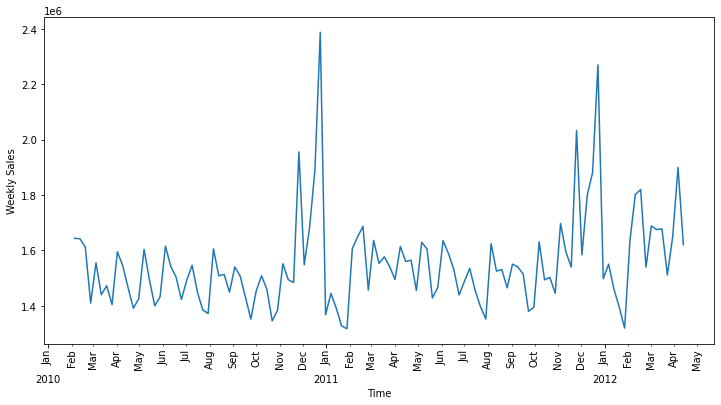

In [14]:
plot_timeseries(region1_train["Weekly_Sales"], date=region1_train["Date"])

In [16]:
temp_train = region1_train.copy()
temp_test = region1_test.copy()

temp_train["Source"] = "train"
temp_test["Source"] = "test"

temp = pd.concat([temp_train, temp_test], axis=0)
temp = temp.reset_index()

temp["Date"] = pd.to_datetime(temp["Date"])

In [17]:
temp

,index,Region,Date,Weekly_Sales,Source
0,0,1,2010-02-05,1643690.90,train
1,1,1,2010-02-12,1641957.44,train
2,2,1,2010-02-19,1611968.17,train
3,3,1,2010-02-26,1409727.59,train
4,4,1,2010-03-05,1554806.68,train
...,...,...,...,...,...
138,23,1,2012-09-28,1437059.26,test
139,24,1,2012-10-05,1670785.97,test
140,25,1,2012-10-12,1573072.81,test
141,26,1,2012-10-19,1508068.77,test


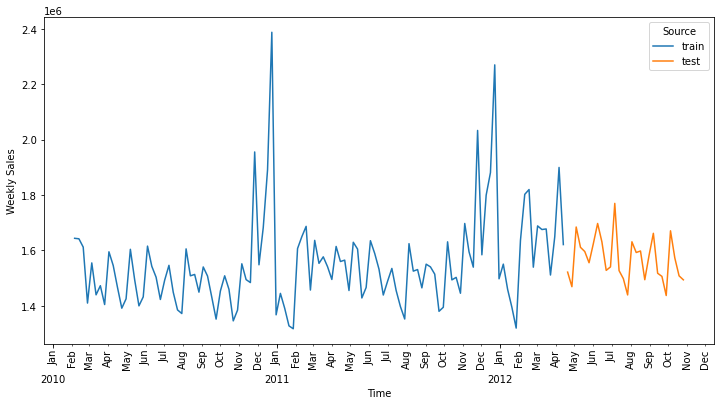

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
ax= sns.lineplot(x="Date", y="Weekly_Sales", hue="Source", data=temp)
ax.set_xlabel("Time")
ax.set_ylabel("Weekly Sales")
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_minor_formatter(DateFormatter("%b"))
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n%Y'))

ax.xaxis.remove_overlapping_locs = False

plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
plt.show()

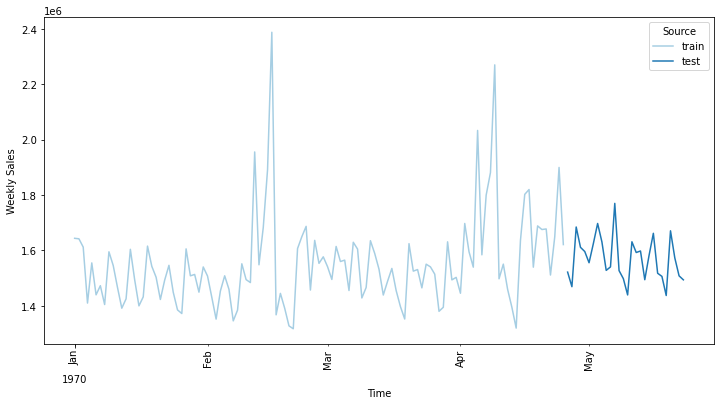

In [109]:
plot_timeseries_complex("Source", "Weekly_Sales", temp, "Date")

In [ ]:
plot

In [30]:
region1_train

,Region,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
110,1,2012-03-16,1677472.78
111,1,2012-03-23,1511068.07
112,1,2012-03-30,1649604.63
113,1,2012-04-06,1899676.88


In [32]:
region1_dates[:len(region1_train)]

0     2010-02-05
1     2010-02-12
2     2010-02-19
3     2010-02-26
4     2010-03-05
         ...    
110   2012-03-16
111   2012-03-23
112   2012-03-30
113   2012-04-06
114   2012-04-13
Name: Date, Length: 115, dtype: datetime64[ns]

In [35]:
len(region1_dates[-len(region1_test):])

28

In [36]:
len(region1_dates)

143

In [41]:
df_train = pd.DataFrame({"value": region1_train["Weekly_Sales"].values, "Date": region1_dates[:len(region1_train)]})
df_test = pd.DataFrame({"value": region1_test["Weekly_Sales"].values, "Date": region1_dates[-len(region1_test):]})
df_pred = pd.DataFrame({"value": region1_pred["Pred"].values, "Date": region1_dates[-len(region1_pred):]})

In [42]:
df_train["Source"] = "train"
df_test["Source"] = "test"
df_pred["Source"] = "pred"

In [48]:
temp = pd.concat([df_train, df_test, df_pred], axis = 0).reset_index()

In [49]:
temp.head()

,index,value,Date,Source
0,0,1643690.90,2010-02-05,train
1,1,1641957.44,2010-02-12,train
2,2,1611968.17,2010-02-19,train
3,3,1409727.59,2010-02-26,train
4,4,1554806.68,2010-03-05,train


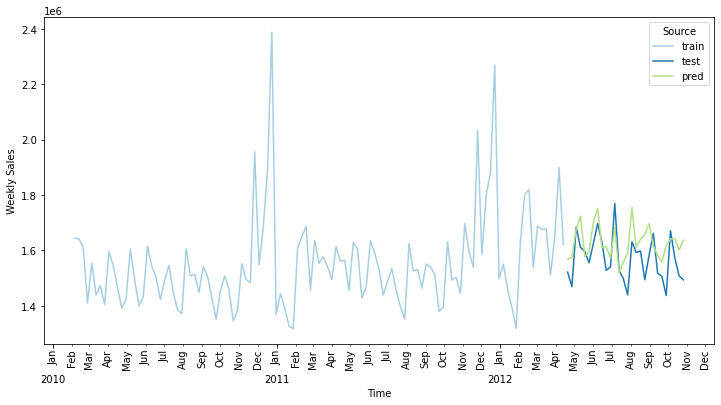

In [50]:
plot_timeseries_complex("Source", "value", temp, "Date")

In [28]:
region1_dates = pd.concat([region1_train["Date"], region1_test["Date"]])

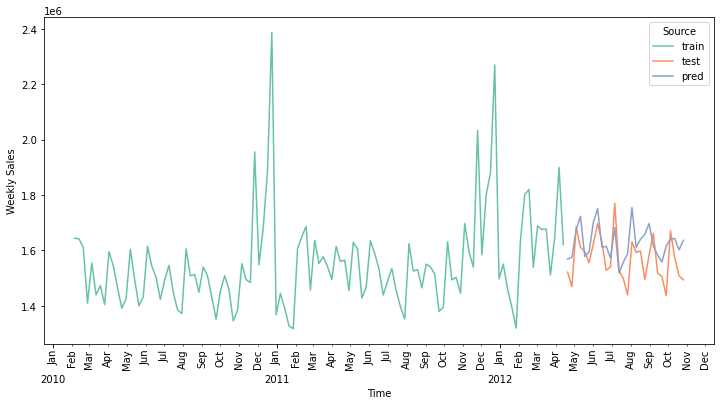

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.lineplot(x="Date", y="value", hue="Source", data=temp, 
legend="full", palette="Set2")
ax.set_xlabel("Time")
ax.set_ylabel("Weekly Sales")
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_minor_formatter(DateFormatter("%b"))
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n%Y'))

ax.xaxis.remove_overlapping_locs = False


plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
plt.show()

In [77]:
def plot_forecast(train, pred, test=pd.Series([]), full_series = False, 
time= pd.Series([])):
    if len(time) > 0 :
        df_train = pd.DataFrame({"value": train, "Date": time[:len(train)]})
        df_test = pd.DataFrame({"value": test, "Date": time[-len(test):]})
        df_pred = pd.DataFrame({"value": pred, "Date": time[-len(pred):]})
        
        df_train["Source"] = "train"
        df_test["Source"] = "test"
        df_pred["Source"] = "pred"
        
        temp = pd.concat([df_train, df_test, df_pred], axis = 0).reset_index()

        fig, ax = plt.subplots(figsize=(12, 6))

        ax=sns.lineplot(x="Date", y="value", hue="Source", data=temp, 
        legend="full", palette="Set2")
        ax.set_xlabel("Time")
        ax.set_ylabel("Weekly Sales")
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.xaxis.set_minor_formatter(DateFormatter("%b"))
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_major_formatter(DateFormatter('\n\n%Y'))

        ax.xaxis.remove_overlapping_locs = False

        plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
        plt.show()

        
    else: 
        if not full_series:
            train = pd.Series(train)
            index_start = train.index[-1] + 1
            pred_series = pd.Series(pred, index=np.arange(start=index_start, stop=index_start + len(pred)))
        else:
            pred_series = pd.Series(pred)

        plt.figure(figsize=(12,5), dpi=100)
        plt.plot(train, label='training')
        if test.any():
            test_series = pd.Series(test, index=np.arange(start=index_start, stop=index_start + len(test)))
            plt.plot(test_series, label='actual')
            
        
        plt.plot(pred_series, label='forecast')
        # plt.fill_between(lower_series.index, lower_series, upper_series, 
        #                  color='k', alpha=.15)
        plt.title('Forecast vs Actuals')
        plt.legend(loc='upper left', fontsize=8)
        plt.show()

/var/folders/gp/1_dqbwsn08sbtf7s0k5q2lsc0000gn/T/ipykernel_88909/3250581454.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_forecast(train, pred, test=pd.Series([]), full_series = False,
/var/folders/gp/1_dqbwsn08sbtf7s0k5q2lsc0000gn/T/ipykernel_88909/3250581454.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  time= pd.Series([])):


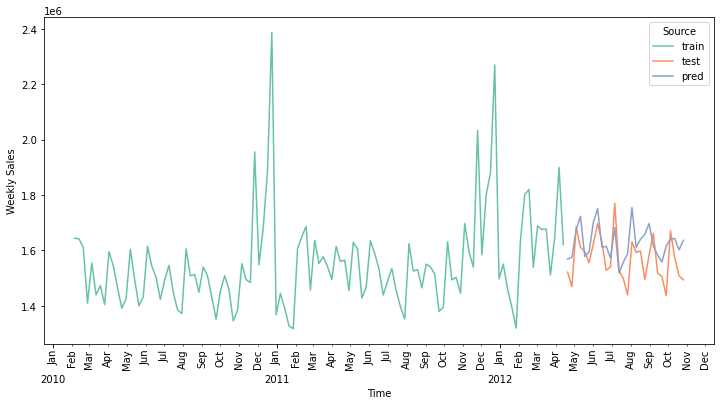

In [78]:
plot_forecast(region1_train["Weekly_Sales"].values, region1_pred["Pred"].values, 
region1_test["Weekly_Sales"].values, time=region1_dates)

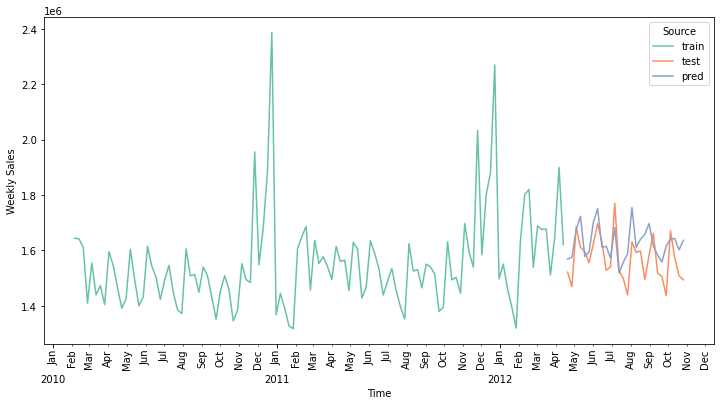

In [79]:
plot_forecast(region1_train["Weekly_Sales"].values, region1_pred["Pred"].values, 
region1_test["Weekly_Sales"].values, time=region1_dates)

In [81]:
temp

,index,value,Date,Source
0,0,1.643691e+06,2010-02-05,train
1,1,1.641957e+06,2010-02-12,train
2,2,1.611968e+06,2010-02-19,train
3,3,1.409728e+06,2010-02-26,train
4,4,1.554807e+06,2010-03-05,train
...,...,...,...,...
166,23,1.616291e+06,2012-09-28,pred
167,24,1.641349e+06,2012-10-05,pred
168,25,1.642562e+06,2012-10-12,pred
169,26,1.601765e+06,2012-10-19,pred


In [83]:
temp["Source"].unique()

array(['train', 'test', 'pred'], dtype=object)

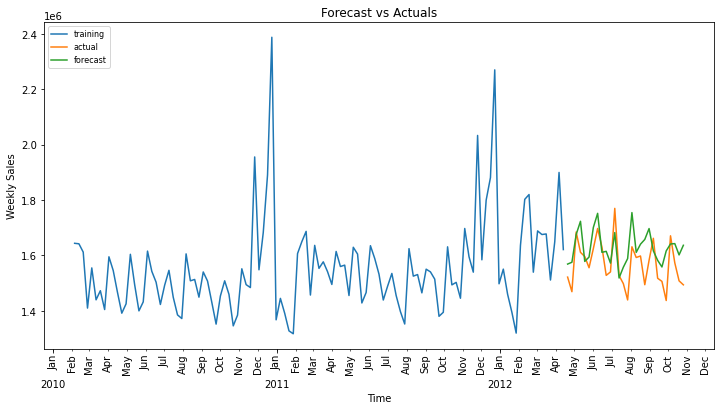

In [102]:
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(temp.loc[temp["Source"] == "train", "Date"], temp.loc[temp["Source"] == "train", "value"],label='training')
# plt.plot(temp.loc[temp["Source"] == "test", "Date"],temp.loc[temp["Source"] == "test", "value"], label='actual')
# plt.plot(temp.loc[temp["Source"] == "pred", "Date"], temp.loc[temp["Source"] == "pred", "value"], label='forecast')
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)

fig, ax = plt.subplots(figsize=(12, 6))

# ax=sns.lineplot(x="Date", y="value", hue="Source", data=temp, 
# legend="full", palette="Set2")


ax.plot(temp.loc[temp["Source"] == "train", "Date"], temp.loc[temp["Source"] == "train", "value"],label='training')
ax.plot(temp.loc[temp["Source"] == "test", "Date"],temp.loc[temp["Source"] == "test", "value"], label='actual')
ax.plot(temp.loc[temp["Source"] == "pred", "Date"], temp.loc[temp["Source"] == "pred", "value"], label='forecast')

ax.set_title('Forecast vs Actuals')
ax.legend(loc='upper left', fontsize=8)

ax.set_xlabel("Time")
ax.set_ylabel("Weekly Sales")
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_minor_formatter(DateFormatter("%b"))
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n%Y'))

ax.xaxis.remove_overlapping_locs = False

plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
plt.show()

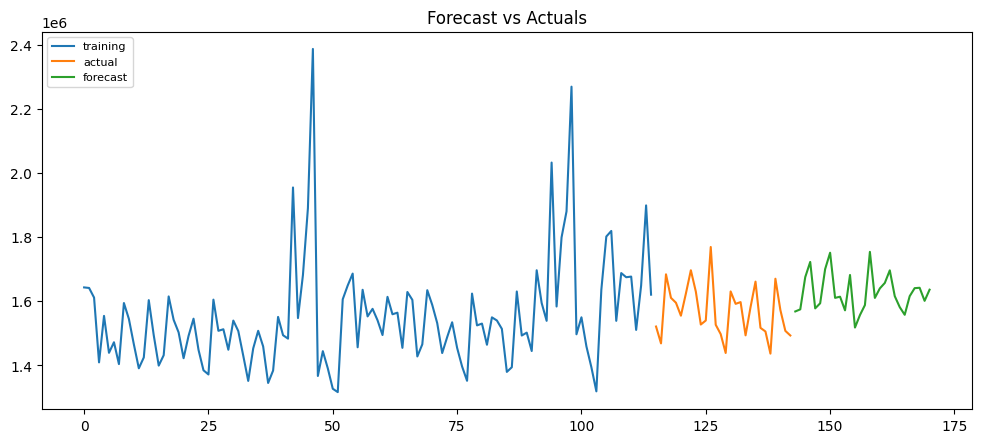

In [87]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(temp.loc[temp["Source"] == "train", "value"], label='training')
plt.plot(temp.loc[temp["Source"] == "test", "value"], label='actual')
plt.plot(temp.loc[temp["Source"] == "pred", "value"], label='forecast')

# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()